In [187]:
import re
import ast
import numpy as np
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt

In [192]:
logs = None
with open('output.txt','r') as f:
    logs = f.read()

In [193]:
def process_logs(logs):
    # split log at new lines, get rid of docker information
    logs = logs.splitlines()[8:-1]
    # get rid of docker decoration per line
    logs = list(map(lambda log: log[37:],logs))
    # removes lines 'client n going to sleep'
    logs = list(filter(lambda x: re.search("going to sleep",x) == None,logs))
    return logs

In [176]:
def parse_logs(logs):
    json = []
    for i in range(0,len(logs),6):
        updates_done = list(map(lambda x: int(x[2:]),re.findall(", [0-9]+",logs[i])))
        requests_seen = list(map(lambda x: int(x[2:]),re.findall(", [0-9]+",logs[i+1])))
        vals = re.findall("[0-9]+",logs[i+2])
        total_seen = int(vals[0])
        max_lag = int(vals[1])
        scouts_spawned = list(map(lambda x: int(x[2:]),re.findall(", [0-9]+",logs[i+3])))
        commanders_spawned = list(map(lambda x: int(x[2:]),re.findall(", [0-9]+",logs[i+4])))
        json.append({"time": int(re.search("[0-9]+",logs[i]).group(0)),
                    "updates_done": updates_done, "requests_seen": requests_seen, "scouts_spawned": scouts_spawned,
                    "commanders_spawned":commanders_spawned, "total_seen": total_seen, "max_lag": max_lag})
    return json

In [177]:
parsed_values = parse_logs(process_logs(logs))

In [178]:
parsed_values

[{'time': 1000,
  'updates_done': [145, 145, 145],
  'requests_seen': [69, 68, 69],
  'scouts_spawned': [13, 20, 18],
  'commanders_spawned': [95, 1328, 1407],
  'total_seen': 1000,
  'max_lag': 206},
 {'time': 2000,
  'updates_done': [458, 458, 458],
  'requests_seen': [185, 180, 182],
  'scouts_spawned': [15, 29, 28],
  'commanders_spawned': [95, 3875, 4099],
  'total_seen': 2000,
  'max_lag': 547},
 {'time': 3000,
  'updates_done': [867, 867, 867],
  'requests_seen': [289, 288, 290],
  'scouts_spawned': [16, 30, 29],
  'commanders_spawned': [95, 4545, 5323],
  'total_seen': 3000,
  'max_lag': 867},
 {'time': 4000,
  'updates_done': [1176, 1176, 1176],
  'requests_seen': [392, 392, 393],
  'scouts_spawned': [16, 31, 30],
  'commanders_spawned': [95, 5426, 6509],
  'total_seen': 4000,
  'max_lag': 1177},
 {'time': 5000,
  'updates_done': [1490, 1490, 1490],
  'requests_seen': [497, 496, 498],
  'scouts_spawned': [17, 32, 31],
  'commanders_spawned': [95, 6709, 8100],
  'total_seen': 5

In [179]:
time, updates = \
list(map(lambda x: x['time'], parsed_values)),list(map(lambda x: np.mean(x['updates_done']),parsed_values))

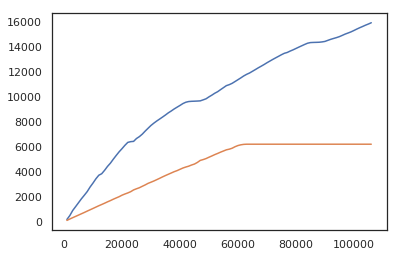

In [188]:
sns.lineplot(time,updates)
sns.lineplot(time,list(map(lambda x: np.mean(x['requests_seen']),parsed_values)))
plt.show()

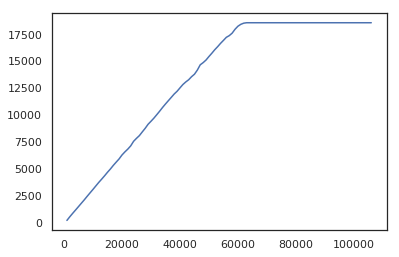

In [189]:
sns.lineplot(time, list(map(lambda x: np.mean(x['max_lag']),parsed_values)))